# Variance

분산은, 데이터가 **얼마나 퍼져있는지**를 측정하는 방법. 

이는 각 값들의 평균으로부터 차이의 제곱 평균이다. 

즉, 분산을 구하기 위해서는 일반적으로 평균을 먼저 계산하여야 한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 랜덤한 50개의 정수를 포함하는 2 변수 설정.
variance_one = []
variance_two = []
for x in range(50):
  variance_one.append(random.randint(25,75))
  variance_two.append(random.randint(0,100))
  
variance_data = {'v1': variance_one, 'v2': variance_two}

variance_df = pd.DataFrame(variance_data)
variance_df['zeros'] = pd.Series(list(np.zeros(50)))

variance_df.head()

,v1,v2,zeros
0,66,19,0.0
1,40,31,0.0
2,73,19,0.0
3,35,48,0.0
4,50,65,0.0


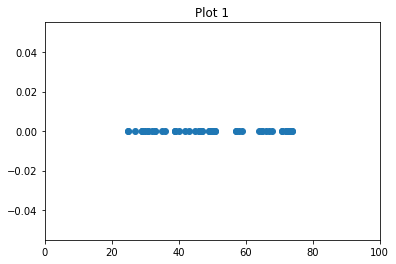

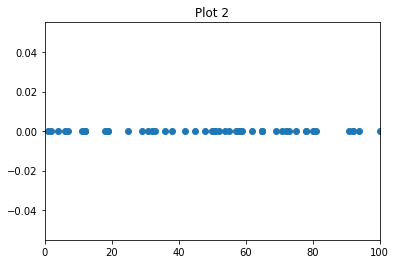

In [2]:
# scatter plot

plt.scatter(variance_df.v1, variance_df.zeros)
plt.xlim(0,100)
plt.title("Plot 1")
plt.show()

plt.scatter(variance_df.v2, variance_df.zeros)
plt.xlim(0,100)
plt.title("Plot 2")
plt.show()

위의 두 데이터에 대해서, 벌어져있는 정도의 차이를 쉽게 확인 할 수 있다. 

그러나 보이는 것 말고 실제 값을 통해서 계산을 해보면

$\overline{X}$ 는 평균, $N$ 은 관측의 수 이다. (샘플의 수)

$v$ 혹은 분산은 일반적으로 소문자 v로 표기되며 필요에 따라 $\sigma^{2}$로 표기되기도 한다.

\begin{align}
v = \frac{\sum{(X_{i} - \overline{X})^{2}} }{N}
\end{align}

평균을 계산하는 방법은, 전부 더한 다음 수로 나누는 것임. 

그러나 이번 계산에서는 평균을 구하는 것이 아니기 때문에, 값만 더하는 것이 아니라 평균과의 차이의 제곱을 더하게 될 것임.

In [3]:
# 평균
v1_mean = variance_df.v1.mean()
print("v1 mean: ", v1_mean)
v2_mean = variance_df.v2.mean()
print("v2 mean: ", v2_mean)

# 각 데이터로부터 평균까지의 거리

variance_df['v1_distance'] = variance_df.v1-v1_mean
variance_df['v2_distance'] = variance_df.v2-v2_mean

variance_df.head()

v1 mean:  49.54
v2 mean:  48.6


,v1,v2,zeros,v1_distance,v2_distance
0,66,19,0.0,16.46,-29.6
1,40,31,0.0,-9.54,-17.6
2,73,19,0.0,23.46,-29.6
3,35,48,0.0,-14.54,-0.6
4,50,65,0.0,0.46,16.4


In [5]:
# 제곱 
variance_df['v1_squared_distance'] = variance_df.v1_distance**2
variance_df['v2_squared_distance'] = variance_df.v2_distance**2

# 제곱을 통해서 음수를 양수로 (거리의 크기) 바꿀 수 있음.

variance_df.head()

,v1,v2,zeros,v1_distance,v2_distance,v1_squared_distance,v2_squared_distance
0,66,19,0.0,16.46,-29.6,270.9316,876.16
1,40,31,0.0,-9.54,-17.6,91.0116,309.76
2,73,19,0.0,23.46,-29.6,550.3716,876.16
3,35,48,0.0,-14.54,-0.6,211.4116,0.36
4,50,65,0.0,0.46,16.4,0.2116,268.96


In [6]:
# 더하고 나눔
observations = len(variance_df)
print("Number of Observations: ", observations)

Variance_One = variance_df.v1_squared_distance.sum()/observations
Variance_Two = variance_df.v2_squared_distance.sum()/observations

print("Variance One: ", Variance_One)
print("Variance Two: ", Variance_Two)

Number of Observations:  50
Variance One:  250.7684
Variance Two:  768.36


In [7]:
print("분산의 차이 =", Variance_Two/Variance_One) 

분산의 차이 = 3.064022420687774


## Variance 쉽게 계산하기

주의할점으로, 위의 결과는 이전에 계산했던 결과와는 조금 다른데 그 이유는, 분산을 계산하는 방법이 모집단이냐 혹은 샘플이냐에 따라서 달라지기 때문이다.

 **모집단의 분산** $\sigma^{2}$ 는 모집단의 **PARAMETER** (aspect, property, attribute, etc)이며,

The **샘플의 분산** $s^{2}$ 는 샘플의 **STATISTIC** (estimated attribute)이다.

복잡한 차이가 있기는 하지만, 샘플 분산 $s^{2}$ 는 모집단 분산 $\sigma^{2}$의 추정치이다.

일반적으로, **샘플**의 분산을 계산 할때는 $N-1$로 나누어야 한다. 앞서 우리가 데이터를 통해 계산했던 방식은 **모집단의 분산**이다.

그렇기 때문에 만약 우리가 자유도를 0 으로 설정하는 경우, 동일한 값을 얻을 수 있다.

In [8]:
print(variance_df.v1.var(ddof = 0))
print(variance_df.v2.var(ddof = 0))

250.7684
768.36


# Standard Deviation

분산의 의미를 이해했다면, 표준편차는 더 쉬움. 

표준편차는 분산의 값에 $\sqrt()$를 씌운 것.


## 분산 / 표준편차

분산을 구하는 과정에서 우리는 더할때 제곱 값들을 더했다. 

그렇기 때문에 평균에 비해서 스케일이 커지는 문제가 있는데,  

표준 편차는 이를 해결 하기 위해서 제곱 된 스케일을 낮춘 방법이다. 

이는 많은 통계분석 프로세스에서 표준편차를 사용하여 계산하는 이유 중 하나이다.

In [9]:
print(variance_df.v1.std(ddof=0)) # std 에 주의
print(variance_df.v2.std(ddof=0))

15.835668599715012
27.719307350653622


# Covariance

- Covariance란, 1개의 변수 값이 변화할 때 다른 변수가 어떠한 **연관성을 나타내며 변하는지**를 측정하는 것이다. 

<https://en.wikipedia.org/wiki/Covariance#Definition>


## 공분산 이해하기

큰 값의 공분산은 두 변수간의 큰 연관성을 나타낸다. 

그러나, 만약 변수들이 다른 스케일을 가지고 있다면 공분산은 실제 변수의 연관성에 관계 없이 영향을 받게 될 것이다. 

다시 말하면 만약 두 변수가 연관성이 적더라도 큰 스케일을 가지고 있다면, 연관이 높지만 스케일이 작은 변수들에 비해서 높은 공분산 값을 가지게 될 것이다. 

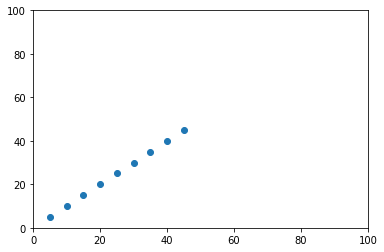

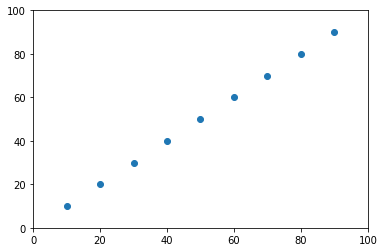

In [10]:
a = b = np.arange(5, 50, 5)
c = d = np.arange(10,100,10)

fake_data = {"a": a, "b": b, "c": c, "d": d}

df = pd.DataFrame(fake_data)

plt.scatter(df.a, df.b)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

plt.scatter(df.c, df.d)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

# Variance-covariance matrix

위 데이터에 대해서 공분산을 계산하기 위한 방법은 다음과 같다.

In [11]:
df.cov()

,a,b,c,d
a,187.5,187.5,375.0,375.0
b,187.5,187.5,375.0,375.0
c,375.0,375.0,750.0,750.0
d,375.0,375.0,750.0,750.0


이러한 matrix를 variance-covariance matrix 라고 표현하며, 
대각선 부분은 **공분산**이 아닌, **분산**을 표현한다.

앞의 두 데이터셋은 동일한 연관성을 갖고 있지만 ($x$ = $y$), 계산된 공분산의 값은 매우 다르다.

-> 스케일링

# Correlation coefficient

분산에서 스케일을 조정하기 위해 표준편차를 사용했던 것처럼, 

이번에도 공분산의 스케일을 조정할 수 있다. 

공분산을 두 변수의 표준편차로 각각 나눠주면 스케일을 조정할 수 있으며 상관계수라고 부른다.

상관계수는 -1에서 1까지로 정해진 범위 안의 값만을 갖으며 선형연관성이 없는 경우 0에 근접하게 된다. 

대부분의 경우, 상관계수는 공분산에 비해서 **더 좋은** 지표로써 사용되며 이유는 다음과 같다

- 공분산은 이론상 모든 값을 가질 수 있지만, 상관계수는 `-1 ~ 1` 사이로 정해져 비교하기가 쉽다.
- 공분산은 항상 스케일, 단위를 포함하고 있지만, 상관계수는 이에 영향을 받지 않는다.
- 상관계수는 데이터의 평균 혹은 분산의 크기에 영향을 받지 않는다.

상관 계수는 일반적으로 소문자 $r$로 표현.

\begin{align}
cor(X,Y) = r = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}} 
\end{align}

위의 데이터를 바탕으로 correlation을 계산해보면

In [12]:
df.corr()

,a,b,c,d
a,1.0,1.0,1.0,1.0
b,1.0,1.0,1.0,1.0
c,1.0,1.0,1.0,1.0
d,1.0,1.0,1.0,1.0


상관계수가 1이라는 것은 한 변수가 다른 변수에 대해서 완벽한 양의 선형 관계를 갖고 있다는 것을 의미.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1200px-Correlation_examples2.svg.png' width = 500>



지금까지의 상관계수는 Pearson correlation이라 부른다.

이는 데이터로부터 분산과 같은 통계치를 계산할 수 있을때 사용 가능하다.

데이터가 만약 categorical 이라면 Spearman correlation coefficient 를 사용한다.

spearman correlation coefficient 는 값들에 대해서 순서 혹은 rank를 매기고, 그를 바탕으로 correlation을 측정하는 Non-parametric한 방식이다.

# Orthogonality

Orthogonality란, 벡터 혹은 매트릭스가 서로 수직으로 있는 상태를 나타낸다.

## 벡터의 orthogonality 확인

임의의 두 벡터의 내적값이 0이라면 서로 수직으로 배치되어 있다.

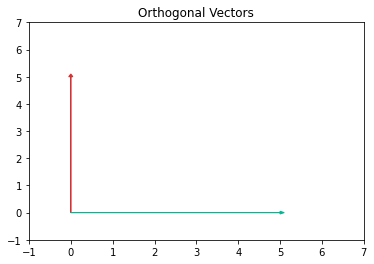

In [13]:
vector_1 = [0, 5]
vector_2 = [5, 0]

plt.arrow(0, 0, vector_1[0], vector_1[1], head_width = .1, head_length = .1, color ='#d63031')
plt.arrow(0, 0, vector_2[0], vector_2[1], head_width = .1, head_length = .1, color ='#00b894')
plt.xlim(-1, 7)          
plt.ylim(-1, 7)
plt.title("Orthogonal Vectors")
plt.show()

그래프 상에서는 명확하게 벡터들이 서로 수직하다는것을 확인 할 수 있다.

\begin{align}
a = \begin{bmatrix} 0 & 5\end{bmatrix}
\qquad
b = \begin{bmatrix} 5 & 0\end{bmatrix}
\\
a \cdot b = (0)(5) + (5)(0) = 0
\end{align}

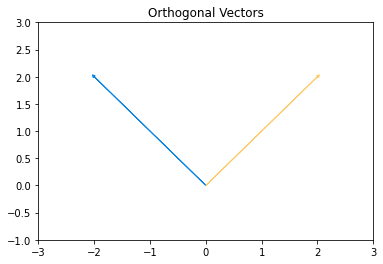

In [14]:
vector_1 = [-2, 2]
vector_2 = [2, 2]

plt.arrow(0, 0, vector_1[0], vector_1[1], head_width = .05, head_length = .05, color ='#0984e3')
plt.arrow(0, 0, vector_2[0], vector_2[1], head_width = .05, head_length = .05, color ='#fdcb6e')
plt.xlim(-3, 3)          
plt.ylim(-1, 3)
plt.title("Orthogonal Vectors")
plt.show()

마찬가지로, 내적값은 0 이다.

\begin{align}
a = \begin{bmatrix} -2 & 2\end{bmatrix}
\qquad
b = \begin{bmatrix} 2 & 2\end{bmatrix}
\\
a \cdot b = (-2)(2) + (2)(2) = 0
\end{align}

# 단위 벡터 ( Unit Vectors )

선형대수에서, 단위 벡터란 "단위 길이(1)"를 갖는 모든 벡터를 말한다. 

$v$ = [1, 2, 2]

||$v$|| = $\sqrt{1^2 + 2^2 + 2^2}$ = 3

$\hat{v}$ = 1 / ||$v$|| $\cdot$ $v$ 

= $1 \over 3$ $\cdot$ [1, 2, 2] = [$1 \over 3$, $2 \over 3$, $2 \over 3$]

||$\hat{v}$|| = 1

---

아래는 각각 1, 2, 3차원의 단위 벡터 이다.

$\mathbb{R}$ unit vector: $\hat{i} = \begin{bmatrix} 1 \end{bmatrix}$

$\mathbb{R}^2$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

$\mathbb{R}^3$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$,  $\hat{k} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$

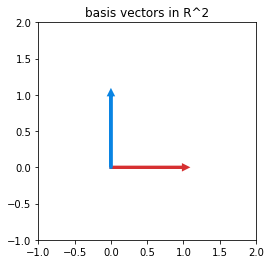

In [15]:
# 축 설정

plt.xlim(-1,2)          
plt.ylim(-1,2)

# 단위 벡터
i_hat = [1,0]
j_hat = [0,1]

# 축 고정 
plt.gca().set_aspect('equal')

# 벡터 그리기
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth = 3, head_width = .05, head_length = .05, color = '#0984e3')
plt.title("basis vectors in R^2")
plt.show()

## 벡터를 단위 벡터의 조합으로 표기

모든 벡터 ( 혹은 매트릭스 )는 단위 벡터의 선형 조합으로 표기된다. 

v = [5, 30]

  = [1, 0] * 5 + [0, 1] * 30 

  = 5 $\cdot$ $\hat{i}$ + 30 $\cdot$ $\hat{j}$

위의 예시처럼, $\mathbb{R}^2$내에 있는 임의의 벡터를 단위 벡터의 조합으로 표기 할 수 있다. 

# Span

Span 이란, 주어진 두 벡터의 (합이나 차와 같은) 조합으로 만들 수 있는 모든 가능한 벡터의 집합이다. (방금 위에서 했던 것처럼)

## 선형 관계의 벡터 (Linearly Dependent Vector)

만약 두 벡터가 같은 선상에 있는 경우, 이 벡터들은 선형 관계에 있다고 표현한다. 즉, 이 두 벡터들은 조합을 통해서 *선 외부의* 새로운 벡터를 생성 할 수 없다. 

이러한 벡터의 span은, 평면 공간이 아닌, 벡터가 이미 올려져 있는 **선**으로 제한된다. 

- ❓ 같은 선상에 있다는 것을 수학적으로 어떻게 표현 할까?

## 선형 관계가 없는 벡터 (Linearly Independent Vectors)

반대로 같은 선상에 있지 않은 벡터들은 선형적으로 독립되어 있다고 표현하며, 

주어진 공간 (2개의 벡터의 경우 $\mathbb{R}^2$ 평면)의 모든 벡터를 조합을 통해 만들어 낼 수 있다.

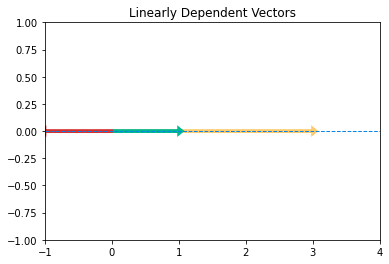

In [16]:
plt.xlim(-1, 4)          
plt.ylim(-1, 1)

# 원 벡터 (초록)
v = [1,0] 

# 선형관계의 벡터
v2 = np.multiply(3, v) # (노랑)
v3 = np.multiply(-1, v) # (빨강)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3', linewidth = 1) # span 선 (파랑)
plt.arrow(0, 0, v2[0], v2[1], linewidth = 3, head_width = .05, head_length = .05, color = '#fdcb6e')
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')
plt.arrow(0, 0, v3[0], v3[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')

plt.title("Linearly Dependent Vectors")
plt.show()

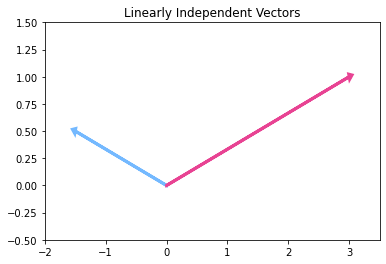

In [17]:
# 선형 관계에 있지 않은 벡터

plt.xlim(-2, 3.5)
plt.ylim(-.5, 1.5)

a = [-1.5, .5]
b = [3, 1]
plt.arrow(0, 0, a[0], a[1], linewidth = 3, head_width = .05, head_length = .05, color = '#74b9ff')
plt.arrow(0, 0, b[0], b[1], linewidth = 3, head_width = .05, head_length = .05, color = '#e84393')

plt.title("Linearly Independent Vectors")
plt.show()

# Basis

벡터 공간 $V$의 basis 는, $V$ 라는 공간을 채울 수 있는 선형 관계에 있지 않은 벡터들의 모음이다. ( span 의 역개념 )

예를 들어, 위의 그림에서 2개의 벡터 (빨강, 파랑)는 벡터 공간 $\mathbb{R}^2$ 의 basis 이다.

## Orthogonal Basis

Orthogonal Basis란, Basis 에 추가로 Orthogonal 한 조건이 붙는, 즉 주어진 공간을 채울 수 있는 **서로 수직인** 벡터들이다.

## Orthonormal Basis

Orthonomal Basis란, Orthogonal Basis에 추가로 Normalized 조건이 붙은 것으로, **길이가 서로 1인** 벡터들이다.

추가로, Gram-Schmidt 프로세스 (주어진 벡터들을 Orthonormal하게 수정하는 과정)에 대해서 알아봐도 좋음.

<img src='https://i.imgur.com/YSWgVKw.png' width = 500>

## ❓ $\mathbb{R}^2$ 의 R은 무슨 의미 일까?

# Rank

- 매트릭스의 rank란, 매트릭스의 열을 이루고 있는 벡터들로 만들 수 있는 (span) 공간의 차원이다. 

- 매트릭스의 차원과는 다를 수도 있으며 그 이유는 행과 열을 이루고 있는 벡터들 가운데 서로 선형 관계가 있을 수도 있기 때문이다. 

- 이 Rank를 확인 하는 방법은 여러가지 가 있지만, 그중 하나인 Gaussian Elimination을 통해 확인해보면


## Gaussian Elimination 

Gaussian Elimination 은 주어진 매트릭스를 "Row-Echelon form"으로 바꾸는 계산과정이다. 

여기서 "Row-Echelon form"이란, 각 행에 대해서 왼쪽에 1, 그 이후 부분은 0으로 이뤄진 형태이다. 

(예시를 참조하세요) 

이러한 매트릭스는 일반적으로 upper-triangular 의 형태를 가지고 있다. 

\begin{align}
 P = \begin{bmatrix}
  1 & 1 & 3 \\
  0 & 1 & 2 \\
  2 & 1 & 4 
 \end{bmatrix}
\end{align}

3행을 1행*2 로 뺌.

\begin{align}
 P = \begin{bmatrix}
  1 & 1 & 3 \\
  0 & 1 & 2 \\
  0 & -1 & -2 
 \end{bmatrix}
\end{align}

3행을 2행으로 더함

\begin{align}
 P = \begin{bmatrix}
  1 & 1 & 3 \\
  0 & 1 & 2 \\
  0 & 0 & 0 
 \end{bmatrix}
\end{align}

** 맨 마지막 줄이 0, 0, 0이다** 라는 것은 3개의 행이, 선형 관계가 있다는 의미.

(다른 행들의 스칼라 곱과 합으로 표현됨) 

$r_3$ = $2 \cdot\ r_1$ - $1 \cdot\ r_2$

$y$ = $a \cdot\ x + b$

---

처음에 주어졌던 매트릭스

\begin{align}
 P = \begin{bmatrix}
  1 & 1 & 3 \\
  0 & 1 & 2 \\
  2 & 1 & 4 
 \end{bmatrix}
\end{align}

의 Rank 는 2이며 이는 3x3 매트릭스 이지만 $\mathbb{R}^{3}$ 공간이 아닌 $\mathbb{R}^{2}$ 만을 벡터들로 만들어 낼 수 있음을 의미. 

## Python 으로 과정 구현하기

$\mathbb{R}^{2}$ 공간의 임의의 선 $L$을 가정

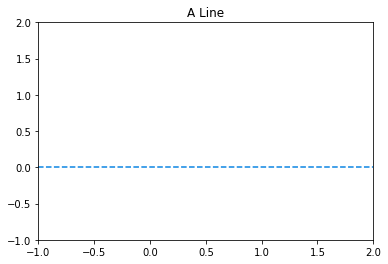

In [18]:
plt.xlim(-1, 2)
plt.ylim(-1, 2)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals
plt.plot(x_vals, y_vals, '--', color = '#0984e3')
plt.title("A Line")
plt.show()

임의의 벡터 $v$가 선 위에 있는 경우, $v$는 아무리 스케일을 변화시켜도 결국 선 위에 있다는 것을 알고 있다.

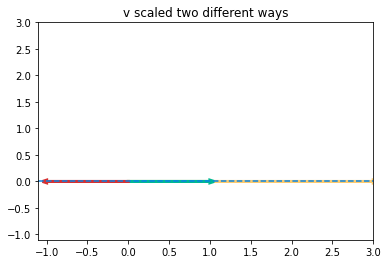

In [20]:
plt.xlim(-1.1, 3)          
plt.ylim(-1.1, 3)

v = [1, 0] 

v2 = np.multiply(3, v)
v3 = np.multiply(-1, v)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3')


plt.arrow(0, 0, v2[0], v2[1], linewidth = 3, head_width = .05, head_length = .05, color = '#fdcb6e')

plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')
#### v2 다음 v를 그리는 이유는 뭘까??


plt.arrow(0, 0, v3[0], v3[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')

plt.title("v scaled two different ways")
plt.show()

녹색 벡터를 $v$ 라고 하면 

처음에 주어진 선 $L$은 $\mathbb{R}$ 공간내의 모든 $v$와 동일하다. 

이를 식으로 표현 하면, 

\begin{align}
L = cv
\end{align}

로 표현 할 수 있다.

이번에는 L위에 "Project" (투사) 하기 위한 새로운 $w$라는 벡터를 추가해보면

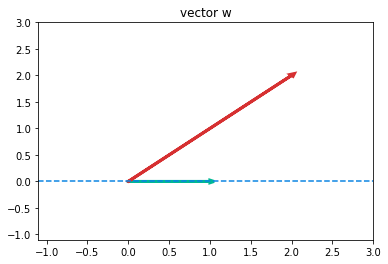

In [21]:
plt.xlim(-1.1, 3)          
plt.ylim(-1.1, 3)

v = [1, 0] 
w = [2, 2]

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3')
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')
plt.arrow(0, 0, w[0], w[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')

plt.title("vector w")
plt.show()

## Notation

Projection을 표기하는 방법은 다음과 같다.

\begin{align}proj_{L}(\vec{w})\end{align}

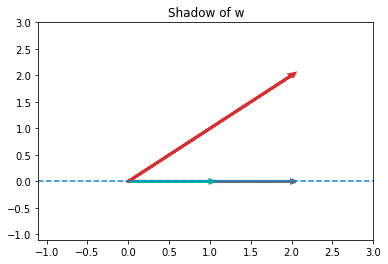

In [22]:
plt.xlim(-1.1, 3)
plt.ylim(-1.1, 3)

v = [1, 0] 
w = [2, 2]
proj = [2, 0]

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3')
plt.arrow(0, 0, proj[0], proj[1], linewidth = 3, head_width = .05, head_length = .05, color = '#636e72')
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')
plt.arrow(0, 0, w[0], w[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')

plt.title("Shadow of w")
plt.show()

위 그림에서 회색 벡터는 ($proj_{L}(w)$) 빨간 벡터의 ($w$) 녹색 벡터에 ($L$) 대한 projection 이며, 녹색 벡터를 기준으로 표기 될 수 있다.

\begin{align}
cv = proj_{L}(w)
\end{align}

그러나 만약 $L$이 x축과 평행하지 않은 조금더 복잡한 상황일 경우 어떻게 계산하여야 할까?

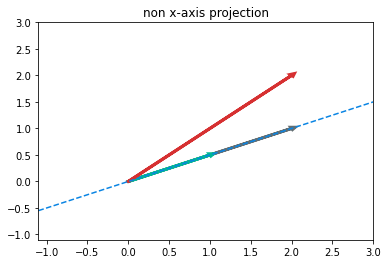

In [23]:
plt.xlim(-1.1, 3)          
plt.ylim(-1.1, 3)

v = [1, 1/2] 
w = [2, 2]
proj = np.multiply(2, v)

axes.set_aspect('equal')

x_vals = np.array(axes.get_xlim())
y_vals = 1/2 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3')
plt.arrow(0, 0, proj[0], proj[1], linewidth = 3, head_width = .05, head_length = .05, color = '#636e72')
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')
plt.arrow(0, 0, w[0], w[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')

plt.title("non x-axis projection")
plt.show()

그림을 통해서는 위처럼, 표기 할 수 있다. 이후 단계에서는 자세한 계산을 해보도록 하겠다.

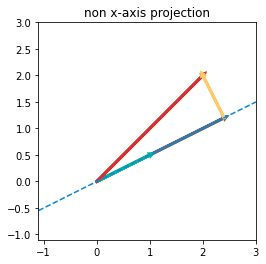

In [24]:
plt.xlim(-1.1, 3)          
plt.ylim(-1.1, 3)

v = [1, 1/2] 
w = [2, 2]
proj = np.multiply(2.4, v)
x_minus_proj = w - proj

plt.gca().set_aspect('equal')

x_vals = np.array(axes.get_xlim())
y_vals = 1/2 * x_vals

plt.plot(x_vals, y_vals, '--', color = '#0984e3')
plt.arrow(0, 0, proj[0], proj[1], linewidth = 3, head_width = .05, head_length = .05, color = '#636e72')
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = '#00b894')
plt.arrow(0, 0, w[0], w[1], linewidth = 3, head_width = .05, head_length = .05, color = '#d63031')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth = 3, head_width = .05, head_length = .05, color = '#fdcb6e')

plt.title("non x-axis projection")
plt.show()

$L$과 Orthogonal 한 노란 벡터를 사용해서 계산을 할건데, 이는 projection $L$에서 시작해서 $w$로 도착하는 벡터이다.

벡터의 합과 차를 기억한다면, 회색 벡터 + 노란 벡터는 빨간 벡터가 된다는 것을 알 수 있다.

즉, 노란 벡터는 빨간 벡터에서 회색 벡터를 뺀 것과 동일한 내용이다. 이를 식으로 표현하면 다음과 같다. $w-proj_{L}(w)$

이전에 L (회색) 에 대한 w (빨강) 의 projection을 cv (녹색 * 스칼라)로 표기 했었는데, 

노란 벡터는 빨간 벡터에서 회색 벡터를 뺀것과 동일하다는 것을 방금 확인 했는데, 이는 $w - cv$의 형태로 표기 될 수 있다.

한가지 더, 회색(녹색도 마찬가지)과 노란색은 서로 수직 상태에 있기 때문에 두 벡터의 내적값은 0 이 나오게 된다.

즉, 회색 $\cdot$ 노란색 = 0.이며 

\begin{align}
v \cdot (w-cv) = 0
\end{align}

라는 식을 얻어 낼 수 있다.

위 식을 풀게 되면

\begin{align}
v \cdot w - c(v \cdot v) = 0
\end{align} 

\begin{align}
v \cdot w = c(v \cdot v)
\end{align} 

\begin{align}
c = \frac{w \cdot v}{v \cdot v}
\end{align}

로 바꿀 수 있으며, $cv = proj_{L}(w)$이므로 양변에 $v$를 곱하여

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}

라는 최종 식을 얻어 낼 수 있다. 

# Linear Projection은 왜 공부하는 걸까?

<img src='https://i.imgur.com/zCIaU1W.png'>


# Exercise

# 1. 주어진 리스트에 대해서 평균, 분산, 표준편차를 구하는 함수를 작성하라. (`mean`같은 builtin function 제외)
> [243, 278, 184, 249, 207] 에 대해서 해당 함수를 사용한 결과가 아래와 같으면 정답.
- mean : 232.2
- var : 1090.96
- std : 33.03

In [25]:
import numpy as np

def mymean(v):
    sum = 0
    n = len(v)
    for i in v:
      sum += i
    return sum/n

def myvar(v):
    sum = 0
    n = len(v)
    for i in v:
      sum = sum + (i - mymean(v))**2
    return sum / n

def mystd(v):
    std = np.sqrt(myvar(v))
    return std

In [26]:
v = [243, 278, 184, 249, 207]
print(mymean(v))
print(myvar(v))
print(mystd(v))

232.2
1090.96
33.02968361943541


## 2. 위에서 사용된 데이터와 다음 데이터의 공분산과, 상관계수를 구하라
> [88, 89, 83, 112, 104] 에 대해서 해당 함수를 사용한 결과가 아래와 같으면 정답.
- cov : 1363.7
- cor : 0.16

In [27]:
x = [88, 89, 83, 112, 104]

res4 = np.cov(v, x)# 공분산
res5 = np.corrcoef(v, x)# 상관계수

In [28]:
print(res4)
print(res5)

[[1363.7   71.7]
 [  71.7  149.7]]
[[1.         0.15868974]
 [0.15868974 1.        ]]


In [29]:
res4 = np.cov(v, x)[0,1]
res5 = np.corrcoef(v, x)[0,1]

res4, res5

(71.7, 0.1586897351257077)

## 3. 다음 벡터들의 span과, 이가 의미하는 바를 설명하라. 

\begin{align}
g = \begin{bmatrix} 1 & 3 \end{bmatrix}
\qquad
h = \begin{bmatrix} 2 & 6 \end{bmatrix}
\end{align}

In [30]:
res6 = 1# span (차원 수)

In [31]:
g = np.array([1, 3])
h = np.array([2, 6])

gh_matrix = np.stack((g, h))

res6 = np.linalg.matrix_rank(gh_matrix)

res6

1

h벡터는 g벡터의 2스칼라배를 하면 만들어진다. 

2g - h = 0 으로 선형 조합을 통해 0이 만들어지기 때문에 g와 h는 종속관계다. 

따라서 g, h의 선형 결합에 대한 결과벡터들은 하나의 직선이므로 span은 1이다.

## 4. 다음 벡터들의 span과, 이가 의미하는 바를 설명하라.

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

<br>

성분의 수가 같은 벡터들 a(1), ..., a(n)이 주어졌다고 하고, 이들의 1차결합으로 표현되는 모든 벡터들의 집합을 이들 벡터들의 생성된 부분공간(space spanned by)이라고 한다.

생성공간(span)은 그 자체로 벡터공간이 되며, 만일 주어진 벡터들 a(1), ..., a(n)이 1차독립이라면, 이 벡터들은 해당 생성공간의 기저가 된다.

출처: https://rfriend.tistory.com/173?category=606751 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [32]:
res7 = 3# span (차원 수)

In [33]:
X = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
np.linalg.matrix_rank(X)

3

벡터의 랭크가 3이므로 각 벡터들은 서로 독립이다.

따라서 세 벡터들이 span하는 공간은 3차원이며 3차원 공간의 모든 벡터는 위의 세 벡터의 조합으로 나타낼 수 있다.

## 5. 다음 매트릭스의 rank를 구하라.

\begin{align}
P = \begin{bmatrix} 
0 & 2 & 5 \\
 3 & 6 & 12 \\
3 & 2 & 2
\end{bmatrix}
\end{align}

In [36]:
res8 = 2 # rank

In [35]:
P = np.array([[0, 2, 5], [3, 6, 12], [3, 2, 2]])
R = np.linalg.matrix_rank(P)
R

2

## 6. 주어진 데이터 (x, y)에 대해서 `y = x` 라는 벡터에 대해 projection을 계산하는 함수를 작성하라.
##  v = [7, 4]
- (x, y) 는 (0, 0) 에서 (x, y)로 가는 벡터라 가정.

이후

- 입력된 데이터를 파란색 선으로, 
- `y = x` 라는 벡터를 빨간색 선으로, 마지막으로 
- projection 된 선을 녹색 점선(dashed)으로 그래프에 그려라.

In [37]:
# 주어진 y = x 벡터의 크기가 1인 단위벡터는

import matplotlib.pyplot as plt

v = [7, 4]

def myProjection(v):
  # 주어진 y = x 벡터에서 norm이 1인 벡터 단위벡터는 다음과 같다.
  x = np.array([np.sqrt(2), np.sqrt(2)])
  
  v = np.array(v)

  # 정사영을 구하는 공식은 다음과 같다.
  # (y dot x) / (x dot x) * x
  S = np.dot(v, x) / np.dot(x, x) * x
  return S

vprime = myProjection(v)
vprime

array([5.5, 5.5])

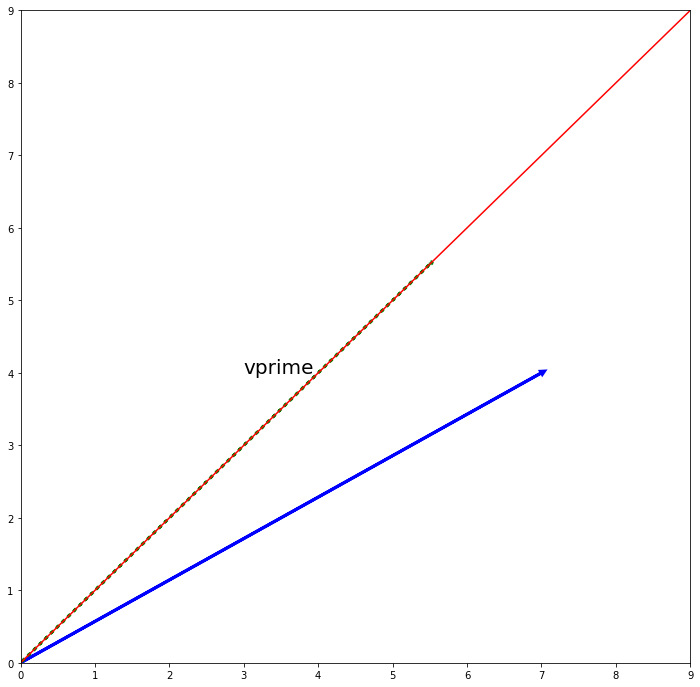

In [38]:
plt.figure(figsize = (12,12))
plt.xlim(0,9)          
plt.ylim(0,9)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = x_vals

plt.plot(x_vals, y_vals, '-', color = 'r')
plt.arrow(0, 0, v[0], v[1], linewidth = 3, head_width = .05, head_length = .05, color = 'b')
plt.arrow(0, 0, vprime[0], vprime[1], linewidth = 3, head_width = .05, head_length = .05, color = 'g', linestyle = ':')

plt.text(3,4,'vprime',size=20)

plt.show()